In [118]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
%matplotlib inline 
import pandas as pd
import seaborn 
import numpy as np 
import matplotlib.pyplot as plt
import pickle as pickle 
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from numpy import mean, std
from numpy import percentile
import os
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator
import random
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_dir="../../../data/"
data_file = 'hly518_2.csv'

## clean the data, fill empty values, change values types, drop unused columns

In [3]:
def data_preprocessing(data_dir,data_file):
    rows = []
    df = pd.read_csv(data_dir+data_file)
    for i in range(len(df)) : 
        rows.append(df.loc[i][0].split(','))
    columns = df.columns[0].split(',')
    df = pd.DataFrame(data=rows, columns=columns)
    #df =df.drop(['wddir','ww','w','sun','vis','clht','clamt','ind'],axis=1)
    df = df.replace(r'^\s*$', np.NaN, regex=True)  
    df.drop_duplicates(keep='first', inplace=True)
    ### fill missing data and drop the remaing
    df = df.fillna(method='ffill')
    df.dropna(axis=0, inplace=True)
    for col in columns:
        if col == 'date':
            df[col] =pd.to_datetime(pd.Series(df[col]))
        else:
            df[col] = df[col].astype("float64")
    df = df.set_index('date')
    df =df.drop(['wddir','ww','w','sun','vis','clht','clamt','ind','dewpt','wetb'],axis=1)
    return df

In [4]:
ff = data_preprocessing(data_dir,data_file)

In [5]:
ff.head()

,rain,temp,vappr,rhum,msl,wdsp
date,,,,,,
1990-01-01 00:00:00,0.0,7.8,10.0,94.0,1005.7,5.0
1990-01-01 01:00:00,0.0,7.6,9.8,94.0,1005.8,3.0
1990-01-01 02:00:00,0.0,7.2,9.6,94.0,1006.1,4.0
1990-01-01 03:00:00,0.0,6.8,8.9,90.0,1006.4,4.0
1990-01-01 04:00:00,0.0,6.3,8.7,91.0,1006.4,3.0


In [114]:
df = ff.copy()
#df = df.iloc[28000:32000]

In [115]:
np.random.seed(1337)
#dg = MultivariateDataGenerator(df,n=len(df.columns),k=2)
dg = MultivariateDataGenerator(df)

In [128]:
def random_extreme_noise(df, percent=3):
    x = list(range(0, len(df)))
    #3% of the data will be anomalies
    index_of_anomalies = random.sample(x,  (int(len(df)/100)*percent))
    index_of_anomalies.sort()
    result = []
    for ano in index_of_anomalies:
        result.append((df.index[ano],))
    return result

In [129]:
def random_variance_or_shift_noise(df, percent=3):
    x = list(range(0, len(df)))
    #3% of the data will be anomalies
    index_of_anomalies = random.sample(x,  (int(len(df)/100)*percent))
    index_of_anomalies.sort()
    result = []
    for x, y in grouped(index_of_anomalies, 2):
        result.append((df.index[x],df.index[y]))
    return result

In [130]:
def random_trend_noise(df, percent=0.08):
    x = list(range(0, len(df)))
    #0.1% of the data will be anomalies
    index_of_anomalies = random.sample(x,  (int(len(df)/100*percent)))
    index_of_anomalies.sort()
    result = []
    for x, y in grouped(index_of_anomalies, 2):
        result.append((df.index[x],df.index[y]))
    return result

In [131]:
def add_noise_to_df(df):
    all_noise_indexs_for_all_cols = []
    
    for col in df.columns:
        noise_indexs_for_curr_col = []
        
        extreme_noise=random_extreme_noise(df)
        variance_or_shift_noise = random_variance_or_shift_noise(df, percent=3)
        trend_noise = random_trend_noise(df)
        noise_indexs_for_curr_col.append(extreme_noise)
        '''
        noise_indexs_for_curr_col.append(variance_or_shift_noise)
        noise_indexs_for_curr_col.append(trend_noise)
        noise_indexs_for_curr_col.append(variance_or_shift_noise)
        
        dd = dg.add_outliers({'extreme': [{'n': df.columns.get_loc(col), 'timestamps': extreme_noise,
                                   'value': 2
                                  }],
                      'shift':   [{'n': df.columns.get_loc(col), 'timestamps': variance_or_shift_noise,
                                   'value': -2  # or 'value' (for a plain addition)
                                  }],
                      'trend':   [{'n': df.columns.get_loc(col), 'timestamps': trend_noise,
                                   'value': 0.10
                                  }],
                      'variance':[{'n': df.columns.get_loc(col), 'timestamps': variance_or_shift_noise,
                                   'value': 2
                                  }]
                     })'''
        dd = dg.add_outliers({'extreme': [{'n': df.columns.get_loc(col), 'timestamps': extreme_noise,
                                   'value': 2
                                  }]
                     })
        
        print('******************************')  
        print('******************************')  
        print('**** origianl '+col+'******')  
        plt.plot(ff[col], label=col)
        plt.legend()
        plt.show()
        print('**** noised '+col+'******')  
        plt.plot(dd[col], label=col)
        plt.legend()
        plt.show()
        print('******************************')  
        print('******************************')
        
        
        all_noise_indexs_for_all_cols.append(noise_indexs_for_curr_col)
    return dd, all_noise_indexs_for_all_cols

******************************
******************************
**** origianl rain******


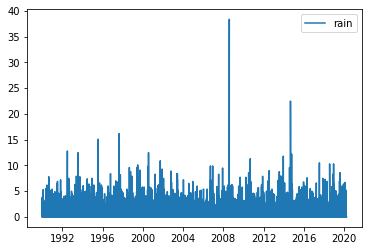

**** noised rain******


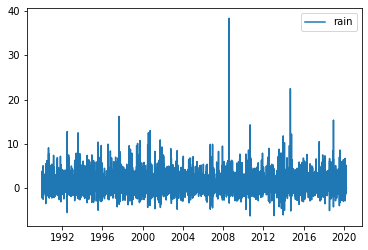

******************************
******************************
******************************
******************************
**** origianl temp******


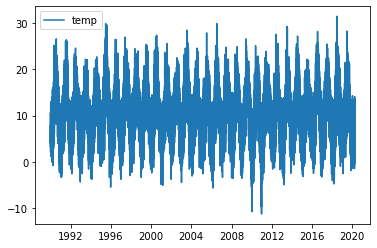

**** noised temp******


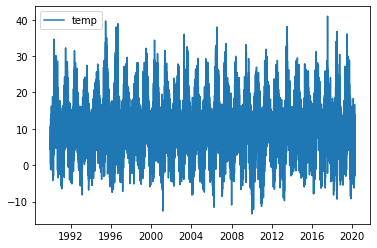

******************************
******************************
******************************
******************************
**** origianl vappr******


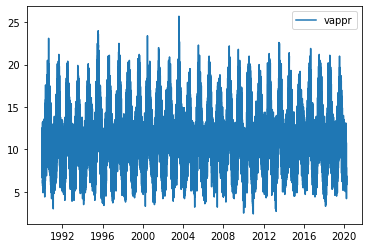

**** noised vappr******


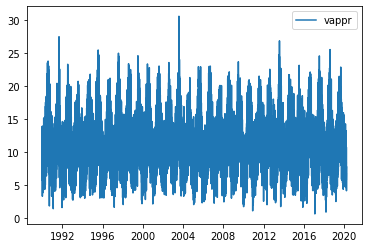

******************************
******************************
******************************
******************************
**** origianl rhum******


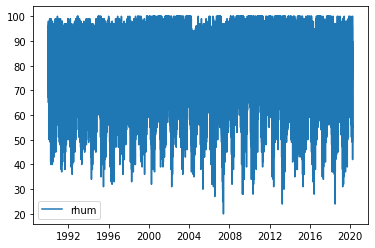

**** noised rhum******


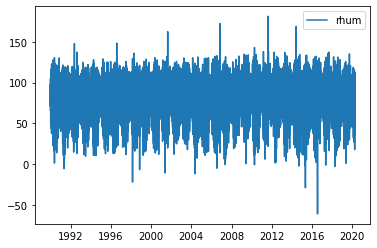

******************************
******************************
******************************
******************************
**** origianl msl******


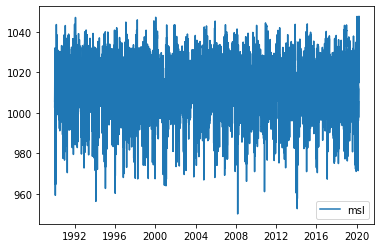

**** noised msl******


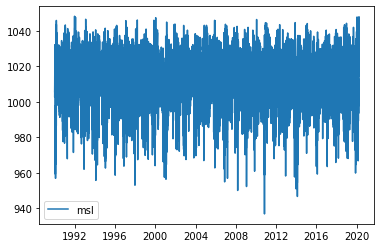

******************************
******************************
******************************
******************************
**** origianl wdsp******


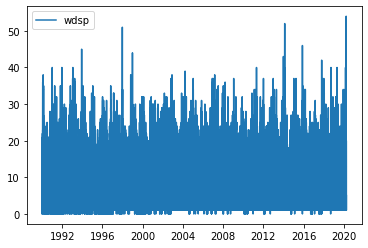

**** noised wdsp******


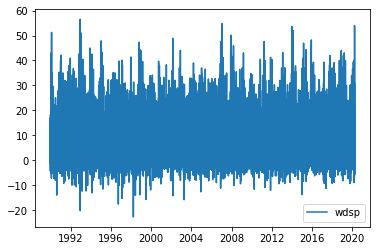

******************************
******************************


In [132]:
noised_df, noise_indexs = add_noise_to_df(df)

In [124]:
pickle.dump(noised_df, open('../../../data/noised_df.pkl', 'wb'))
pickle.dump(noise_indexs, open('../../../data/noise_indexs.pkl', 'wb'))

In [125]:
noised_df = pickle.load(open('../../../data/noised_df.pkl', 'rb'))
noise_indexs = pickle.load(open('../../../data/noise_indexs.pkl', 'rb'))

In [ ]:
'''dd = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(df.index[26547],df.index[26551]), (df.index[26551],)],
                                   'value': 2
                                  }],
                      'shift':   [{'n': 0, 'timestamps': [(df.index[26551],),(df.index[29000],df.index[31000] )],
                                   'value': 1  # or 'value' (for a plain addition)
                                  }],
                      'trend':   [{'n': 0, 'timestamps': [(df.index[26551],),(df.index[27000],df.index[27020] )],
                                   'value': 0.10
                                  }],
                      'variance':[{'n': 0, 'timestamps': [(df.index[1000],df.index[3000]), (df.index[3500],)],
                                   'value': 2
                                  }]
                     })
plt.plot(dd['rain'], label='rain')
plt.legend()
plt.show()'''

In [ ]:
'''dd = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(10,), (19,)],
                                   'value': 1
                                  }],
                      'shift':   [{'n': 1, 'timestamps': [(10, 19)],
                                   'value': -20  # or 'value' (for a plain addition)
                                  }],
                      'trend':   [{'n': 2, 'timestamps': [(2, 15)],
                                   'value': 0.15
                                  }],
                      'variance':[{'n': 3, 'timestamps': [(2, 8)],
                                   'value': 19
                                  }]})

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()
df'''